In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import uniform, norm, expon

Branch banks must keep enough money on hand to satisfy customers' cash demands.  An armored truck delivers cash to the bank once a week.  The bank manager can choose the amount of weekly cash to have delivered.  Running out of cash during the week is terrible customer service and the manager wants to avoid this.  On the other hand, keeping excessive cash reserves costs the bank profits, since cash is a non-interest earning asset.  

The daily demand for cash at this particular bank follows a normal distribution with daily means and std dev summarized in Table 1.

**Table 1**

|                   |Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|:-----------------:|:----:|:-----:|:-------:|:------:|:----:|:------:|:----:|
|Mean (\\$1,000s)   |175   |120    |90       |60      |120   |140     |65    |
|Std Dev (\\$1,000s)|26    |18     |13       |9       |18    |21      |9     |  

  
  
  
a.  Suppose the bank manager starts the week with \\$825,000.  Create a model for daily ending balance and use 10,000 simluations to determine the probability of the bank running out of money at some point during the week.


b.  Estimate the amount of money needed at the start of the week to ensure that there is at most a 2.0\% probability of running out of money.


In [2]:
means = [175, 120, 90, 60, 120, 140, 65]
sds = [26, 18, 13, 9, 18, 21, 9]

sds

[26, 18, 13, 9, 18, 21, 9]

In [3]:
means[0]

175

Probability of running out of cash with $825000: 0.1154
Cash balance percentiles:
  5th percentile:  $0.00
 25th percentile:  $24,007.44
 50th percentile:  $54,881.15 (Median)
 75th percentile:  $85,705.38
 95th percentile:  $130,007.14


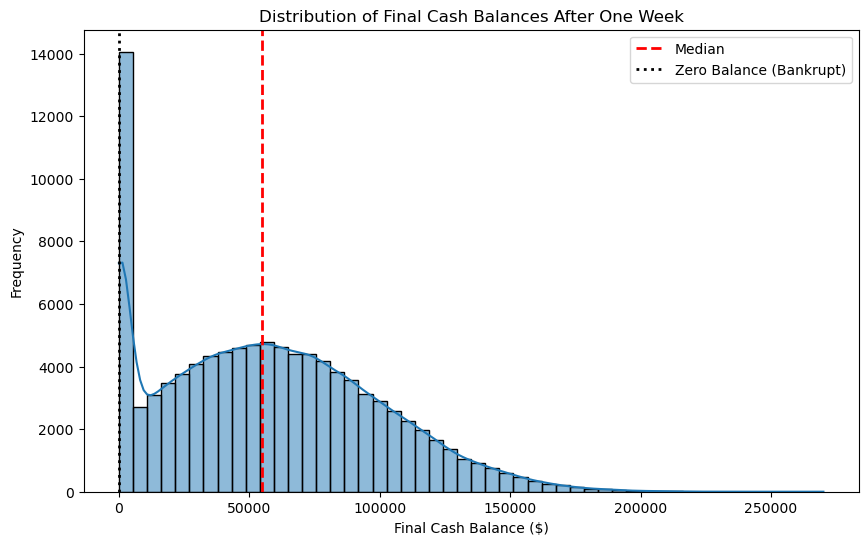

Minimum starting cash to keep run-out probability below 2.00%: $865000


In [18]:
## Simulation model for Cash Balance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulation model for Cash Balance
def bank_cash_simulation(initial_cash=825000, num_simulations=100000, threshold=0.02):
    # Daily cash withdrawal statistics (converted to full dollars)
    daily_means = np.array([175, 120, 90, 60, 120, 140, 65]) * 1000
    daily_stds = np.array([26, 18, 13, 9, 18, 21, 9]) * 1000

    def run_simulation(start_cash):
        cash_balances = np.full(num_simulations, float(start_cash))  # Ensure float type
        for day in range(7):
            daily_withdrawals = np.random.normal(daily_means[day], daily_stds[day], num_simulations)
            cash_balances -= daily_withdrawals
            cash_balances = np.maximum(cash_balances, 0)  # No negative balances
        return cash_balances  # Return all final balances instead of just probability

    # 2. Simulation Trials
    # a. Suppose the bank manager starts the week with $825,000
    final_balances = run_simulation(initial_cash)

    # Compute probability of running out of cash
    prob_run_out = np.mean(final_balances == 0)
    print(f'Probability of running out of cash with ${initial_cash}: {prob_run_out:.4f}')

    # Find the cash balance at risk percentiles (e.g., 5th, 25th, 50th, 75th, 95th)
    percentiles = np.percentile(final_balances, [5, 25, 50, 75, 95])
    print("Cash balance percentiles:")
    print(f'  5th percentile:  ${percentiles[0]:,.2f}')
    print(f' 25th percentile:  ${percentiles[1]:,.2f}')
    print(f' 50th percentile:  ${percentiles[2]:,.2f} (Median)')
    print(f' 75th percentile:  ${percentiles[3]:,.2f}')
    print(f' 95th percentile:  ${percentiles[4]:,.2f}')

    # Histogram of final cash balances
    plt.figure(figsize=(10,6))
    sns.histplot(final_balances, bins=50, kde=True)
    plt.axvline(percentiles[2], color='r', linestyle='dashed', linewidth=2, label="Median")
    plt.axvline(0, color='black', linestyle='dotted', linewidth=2, label="Zero Balance (Bankrupt)")
    plt.xlabel("Final Cash Balance ($)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Final Cash Balances After One Week")
    plt.legend()
    plt.show()

    # 3. Balance What-If
    # b. Estimate the amount of money needed at the start of the week to ensure that there is at most a 2.0% probability of running out of money.
    start_cash = initial_cash
    while np.mean(run_simulation(start_cash) == 0) > threshold:
        start_cash += 10000 
    print(f'Minimum starting cash to keep run-out probability below {threshold:.2%}: ${start_cash}')

# Run simulation
bank_cash_simulation()


In [19]:
## Simulation Trials show in last cell
   
    



a.  Suppose the bank manager starts the week with \\$825,000.  Create a model for daily ending balance and use 100,000 simluations to determine the probability of the bank running out of money at some point during the week.

Answer Here__0.1154___

In [20]:
## Balance What-If in last cell
    

b. Estimate the amount of money needed at the start of the week to ensure that there is at most a 2.0% probability of running out of money.

Answer Here___$865000______